In [1]:
from mybatch import *
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqn
from dataset import Dataset, DatasetIndex

# train poisson regression

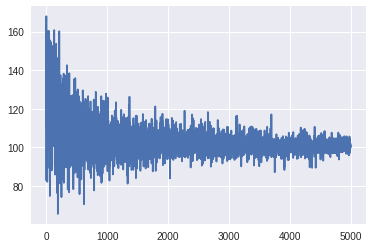

In [2]:
len_data = 5000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss = []

test = np.random.uniform(0,10,3).reshape(1,3)
result = np.zeros(10,dtype = np.float32)

X,y = generate_logistic_data(len_data)
for batch in tqn(dset.gen_batch(10,n_epochs=10)):
    batch.generate(len_data,ttype = 'poisson').train_poisson_model(sess, result, test)
    loss.append(batch.loss)
plt.plot(loss)

# train logistic regression


test:  [-10   5  -1  -1  -1   5] 
 predict:  [0, 1, 0, 0, 0, 1] 



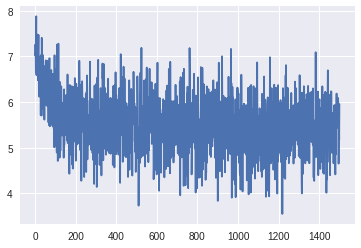

In [8]:
len_data = 5000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0
test = np.array([-10,5,-1,-1,-1,5])
result = np.zeros(len(test),dtype = np.float32)
X,y = generate_logistic_data(len_data)
loss = []
for batch in tqn(dset.gen_batch(10,n_epochs=3)):
    batch.generate(len_data,ttype = 'logistic').train_logistic_model(sess, result, test)
    loss.append(batch.loss)
plt.plot(loss)
result = [0 if i<0.5 else 1 for i in result]
print('test: ', test, '\n', 'predict: ', result,'\n')

loss:  8.61032


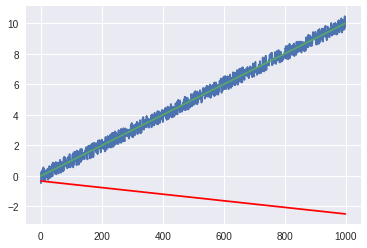

loss:  0.193497


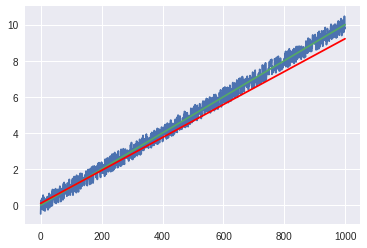

loss:  0.042177


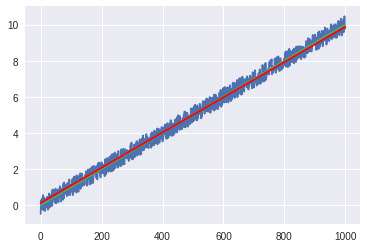

loss:  0.0563314


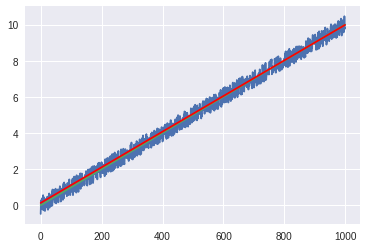

loss:  0.138001


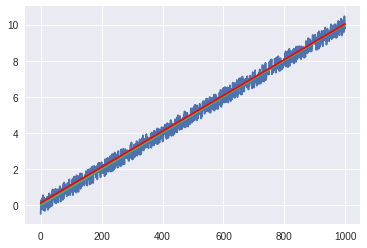

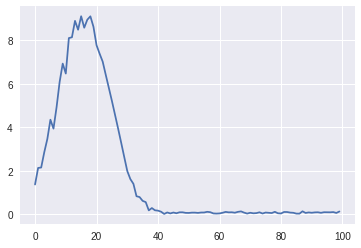

In [10]:
len_data = 1000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0
X,y = generate_linear_data(len_data)
loss = []
for batch in tqn(dset.gen_batch(10,n_epochs=1)):
   # print(i.indices)
    batch.generate(len_data).train_linear_model(sess)
    i +=1
    loss.append(batch.loss)
    if i == 20:
        print('loss: ', batch.loss)
        i = 0
        plt.plot(X)
        plt.plot(y)
        plt.plot(batch.W * y + batch.b, c ='r')
        plt.show()
plt.plot(loss)